## Изучение данных из файла 

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

Подгрузили все необходимы библиотеки, начинаем загружать дата-сеты

In [2]:
# настройка окружения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

### Информация о пользователях

In [3]:
# загружаем информацию о пользователях
try:
    users = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/4. Статистический аналих данных/data/users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Вывод об информации о пользователях

В таблице 8 столбцов. Тип данных:

- *int64* - 2 столбца,
- *object* - 6 столбцов.

Даты не в порядке - формат строковый вместо датового.

38 пользователей прекратили пользование тарифом.

In [5]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


### Информация о звонках

In [6]:
# загружаем информацию о звонках
try:
    calls = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/4. Статистический аналих данных/data/calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

In [7]:
calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


#### Вывод об информации о звонках

В таблице 4 столбца. Тип данных:

- *float64* - 1 стобец,
- *int64* - 1 столбец,
- *object* - 2 столбца.

Некорректный тип данных в колонке с датой.

В документации к данным указаны звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Длительность звонков не в целочисленнном формате, хотя, в данных указано, что оператор всегда округляет звонки до минут.

### Информация о сообщениях

In [10]:
# загружаем информацию о сообщениях
try:
    messages = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/4. Статистический аналих данных/data/messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages.describe()

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


#### Вывод об информации о сообщениях

В таблице 4 столбца. Тип данных:

- *int64* - 1 столбец,
- *object* - 2 столбца.

Некорректный тип данных в колонке с датой.

Непонятно для чего уникальный номер сообщения в строковом формате.

### Информация об интернет-сессиях

In [13]:
# загружаем информацию об интернет-сессиях
try:
    internet = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/4. Статистический аналих данных/data/internet.csv')
except:
    internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [14]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [15]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


#### Вывод об информации об интернет-сессиях

В таблице 5 столбцов. Тип данных:

- *float64* - 1 стобец,
- *int64* - 2 столбца,
- *object* - 2 столбца.

Некорректный тип данных в колонке с датой.

Номер сессии в текстовом формате.

Столбец "Unnamed: 0", который выглядит, как задублировавшийся индекс.

Есть нулевые сессии. В описании к данным указано, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Вероятно, данные сессии ошибочны.

### Информация о тарифах

In [16]:
# загружаем информацию о тарифах
try:
    tariffs = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/4. Статистический аналих данных/data/tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Вывод об информации о тарифах

В таблице 8 столбцов. Тип данных:

- *int64* - 7 столбцов,
- *object* - 1 столбец.

Данные в таблице совпадают с описанием тарифов.

Разные единицы измерения интернет-трафика. Пакет содержит количество мегабайт в месяц, а платим округляя до гигабайт.

### Общий вывод о полученных данных

Имеем 5 таблиц:

- `Таблица users` - информация о пользователях,
- `Таблица calls` - информация о звонках,
- `Таблица messages` - информация о сообщениях,
- `Таблица internet` - информация об интернет-сессиях,
- `Таблица tariffs` - информация о тарифах

Проблемы с данными:

- Некорректные форматы данных
- Нулевые интернет-сессии
- Предположительно задублировавшийся столбец индекса
- Некорректные единицы измерений трафика

## Подготовка данных ##

[Начало тетрадки](#intro)

### Приведите данные к нужным типам, найдите и исправьте ошибки в данных, если они есть. Поясните, какие ошибки вы нашли и как их исправили

In [18]:
# переведем уникальные номера звонков, сообщений и интернет-сессий в цифровой формат из строкового
for frame in [calls, internet, messages]: # все нужные фреймв
    for col in [x for x in frame.columns if 'id' in x]: # все колонки с id
        frame['id'] = frame['id'].astype('int')
        continue # обрабатываем только одну id-колонку в фрейме

In [19]:
# проверим на примере таблицы звонков
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  int32  
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


Уникальные номера стали номерами.

In [20]:
# «Мегалайн» всегда округляет секунды до минут, округлим
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  int32 
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  int32 
 3   user_id    202607 non-null  int64 
dtypes: int32(2), int64(1), object(1)
memory usage: 4.6+ MB


In [22]:
# Столбец 'Unnamed: 0' выглядят похожим на задублированный индекс, проверим
internet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395], dtype=int64)

От 0 до 149395 из 149396 значений. Это, действительно индекс - удалим его. Скорее всего, сохранили CSV файл с индексом (по умполчанию).

In [23]:
del internet['Unnamed: 0']
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  int32  
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 4.0+ MB


Форматы сменились. Лишний столбец удален. Пропусков в данных нет.

In [24]:
# сделаем одинаковые названия столбцу с типом тарифа 
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
# округлим до гигабайт
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')
tariffs = tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [26]:
# добавим колонку с месяцами в таблицы
for frame in [calls, internet, messages]: # все нужные фреймы
    for col in [x for x in frame.columns if 'date' in x]: # все колонки с date
        frame['month'] = pd.to_datetime(frame[col]).dt.month
        continue # обрабатываем только одну date-колонку в фрейме

#### Вывод по предобработке данных

- Изменили неподходящие форматы
- Нашли и удалили ошибочный столбец

Необходимые для анализа расчеты производятся за месяц. Работаем с данными за один календарный год, значит месяца повторяться не будут. Вместо форматирования дат добавили столбец с месяцем.

### Посчитайте для каждого пользователя:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [27]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12


Столбец с месяцем добавлен.

In [28]:
# сгруппируем таблицу по месяцам и сделаем расчеты для звонков и минут
# тут и далее сохраним в новых переменных, не меняем исходники
grouped_calls = calls.groupby(
    [
        'user_id', 
        'month'
    ]
).agg({
    'duration':'sum', 
    'id':'count'
}).reset_index().rename(columns={
    'duration':'month_calls_duration'
    ,'id':'calls_total_in_month'})

In [29]:
grouped_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Таблица сгруппирована для каждого пользователя по номеру месяца.

#### Количество отправленных сообщений по месяцам

In [30]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


Столбец с месяцем добавлен.

In [31]:
grouped_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [32]:
grouped_messages.head()

,user_id,month,sms_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Таблица сгруппирована для каждого пользователя по номеру месяца.

#### Объем израсходованного интернет-трафика по месяцам

In [33]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,"1,052.81",2018-09-07,1000,9
2,10002,"1,197.26",2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


Столбец с месяцем добавлен.

In [34]:
# помним, что «Мегалайн» всегда округляет мегабайты — до гигабайт
# сгруппируем и переназовем
grouped_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'gb_total_in_month'})

In [35]:
# округлим до гигабайт
grouped_internet['gb_total_in_month'] = (grouped_internet['gb_total_in_month']/1024).apply(np.ceil)

In [36]:
grouped_internet.head()

,user_id,month,gb_total_in_month
0,1000,5,3.00
1,1000,6,23.00
2,1000,7,14.00
3,1000,8,14.00
4,1000,9,15.00


#### Помесячную выручку с каждого пользователя

Вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану

In [37]:
# для начала соберем все в одну таблицу
# соберем звонки и сообщения
data = grouped_calls.merge(grouped_messages, on=['user_id', 'month'], how='outer')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,5,159.00,22.00,22.00
1,1000,6,172.00,43.00,60.00
2,1000,7,340.00,47.00,75.00
3,1000,8,408.00,52.00,81.00
4,1000,9,466.00,58.00,57.00


In [38]:
# добавим интернет-трафик
data = data.merge(grouped_internet, on=['user_id','month'], how = 'outer')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month
0,1000,5,159.00,22.00,22.00,3.00
1,1000,6,172.00,43.00,60.00,23.00
2,1000,7,340.00,47.00,75.00,14.00
3,1000,8,408.00,52.00,81.00,14.00
4,1000,9,466.00,58.00,57.00,15.00


In [39]:
# посмотрим на получившиеся в новой таблице пропуски
data.isna().sum()

user_id                   0
month                     0
month_calls_duration     40
calls_total_in_month     40
sms_total_in_month      497
gb_total_in_month        11
dtype: int64

In [40]:
# добавим данные о пользователе
data = data.merge(users, on='user_id', how='outer')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.00,159.00,22.00,22.00,3.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.00,172.00,43.00,60.00,23.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.00,340.00,47.00,75.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.00,408.00,52.00,81.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.00,466.00,58.00,57.00,15.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [41]:
# посмотрим на получившиеся в новой таблице пропуски
data.isna().sum()

user_id                    0
month                      2
month_calls_duration      42
calls_total_in_month      42
sms_total_in_month       499
gb_total_in_month         13
age                        0
churn_date              3027
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
dtype: int64

В таблице появились 2 строки с "полными" пропусками в данных, т.е. 2 месяца кто-то на тарифе был, но не использовал его.

In [42]:
# удалим пользователей без активности, их двое, на общий массив данных они не влияют, но создают выбросы
data = data.dropna(subset=['month'])

In [43]:
data.isna().sum()

user_id                    0
month                      0
month_calls_duration      40
calls_total_in_month      40
sms_total_in_month       497
gb_total_in_month         11
age                        0
churn_date              3027
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
dtype: int64

Пользователи без активности удалены.

In [44]:
# добавим данные о тарифе
data = data.merge(tariffs, on='tariff', how='outer')
data.tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3209,1489,8.00,NaN,NaN,17.00,11.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3210,1489,9.00,NaN,NaN,32.00,17.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3211,1489,10.00,NaN,NaN,21.00,20.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3212,1489,11.00,NaN,NaN,20.00,18.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3213,1489,12.00,NaN,NaN,35.00,17.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3


In [45]:
# посмотрим на получившиеся в новой таблице пропуски
data.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
gb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [46]:
# поставим нули людям, которые не тратят трафик
data['sms_total_in_month'] = data['sms_total_in_month'].fillna(0)
data['gb_total_in_month'] = data['gb_total_in_month'].fillna(0)
data['month_calls_duration'] = data['month_calls_duration'].fillna(0)
data['calls_total_in_month'] = data['calls_total_in_month'].fillna(0)

In [47]:
# проверим заполнение пропусков
data.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
gb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Заполнили нулями строки людей, которые не тратят пакетный трафик

In [48]:
# проверим не возникли ли дубликаты из-за неверной склейки таблиц
data.duplicated().sum()

0

Дубликаты не возникли.

In [49]:
# напишем функцию, которая посчитает деньги, которые пользователи потратили на услуги сверх пакета тарифа
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message'] # для смс
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute'] # для звонков
    gbs = (row['gb_total_in_month'] - row['gb_per_month_included']) * row['rub_per_gb'] # для интернета
    total = 0
    for i in [sms, mins, gbs]:
        if i > 0:
            total += i
    return total

In [50]:
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,159.00,22.00,22.00,3.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6.00,172.00,43.00,60.00,23.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7.00,340.00,47.00,75.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8.00,408.00,52.00,81.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9.00,466.00,58.00,57.00,15.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1


In [51]:
# добавим столбец с суммой, которую пользователь заплатил сверх тарифа
data['above_the_tariff'] = data.apply(lambda x: above_the_tariff(x), axis=1)

In [52]:
# добавим столбец с выручкой с каждого пользователя
data['total_paid'] = data['rub_monthly_fee'] + data['above_the_tariff']

In [53]:
data.sort_values(by='total_paid').tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
2298,1286,12.00,739.00,95.00,68.00,35.00,19,NaN,Москва,Рашид,Троицкий,2018-11-27,smart,50,15,500,550,200,3,3,"4,771.00","5,321.00"
2177,1261,12.00,"1,074.00",141.00,22.00,32.00,46,NaN,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15,500,550,200,3,3,"5,122.00","5,672.00"
3156,1486,11.00,764.00,108.00,96.00,36.00,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15,500,550,200,3,3,"5,130.00","5,680.00"
1183,1042,12.00,728.00,121.00,75.00,37.00,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15,500,550,200,3,3,"5,159.00","5,709.00"
3157,1486,12.00,"1,007.00",133.00,83.00,38.00,35,NaN,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15,500,550,200,3,3,"6,220.00","6,770.00"


Рассчитаны и добавлены в таблицу столбцы:
 - деньги, уплаченные пользователем сверх тарифа
 - помесячная выручка с каждого пользователя

#### Вывод о расчетах

Расчитали и добавили в таблицу данные для каждого пользователя по месяцам:

- о количестве сделанных звонков и израсходованных минут,
- о количестве отправленных сообщений,
- об объем израсходованного интернет-трафика,
- помесячную выручку с каждого пользователя.

## Анализ данных

[Начало тетрадки](#intro)

- Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. Опишите распределения.

In [54]:
data[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,"3,214.00","3,214.00"
mean,550.02,"1,529.08"
std,767.77,798.25
min,0.00,550.00
25%,0.00,750.00
50%,163.50,"1,653.50"
75%,938.00,"1,950.00"
max,"6,220.00","6,770.00"


Рассмотрели значения по колонкам "прибыль сверх тарифа" и "помесячная выручка с каждого пользователя". Отрицательных значений не встречается. В среднее значение "сверх тарифа" выше медианного, а в "помесячной выручке" наоборот медианное значение выше среднего. Минимально "сверх тарифа" мы получаем 0, а суммарно минимально имеем 550 по тарифу "смарт".

In [55]:
# для начала посмотрим на пользователей
data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

- 2229 пользователей на фарифе "smart"
- 985 пользователей на фарифе "ultra"

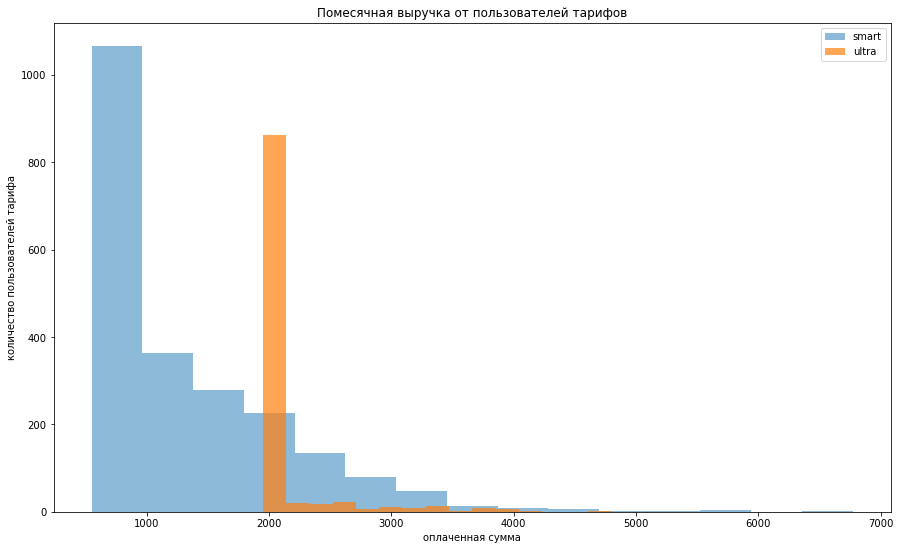

In [56]:
x = data[data['tariff'] == 'smart']['total_paid']
y = data[data['tariff'] == 'ultra']['total_paid']

bins = 15
fig, ax = plt.subplots(figsize=(15,9)) 
plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.7, label='ultra')
plt.title('Помесячная выручка от пользователей тарифов')
ax.set_xlabel('оплаченная сумма')
ax.set_ylabel('количество пользователей тарифа')
plt.legend()
plt.show()

Ультру, видимо, в основном платят по тарифу и мелкими группами вылазят на каждую тысячу рублей. А у Смарта люди вылезают за абонентскую плату чаще, для них это как будто дело привычное

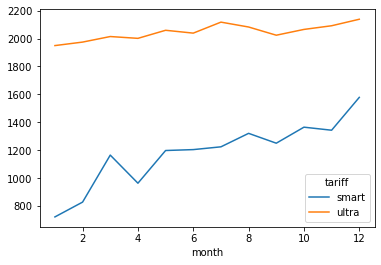

In [57]:
data.pivot_table(index = 'month', columns = 'tariff', values = 'total_paid', aggfunc = 'mean').plot()
data.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

Помня о ценах на тарифы:
- смарт 550
- ультра 1950

Видим, что с течением времени. На тарифе "ультра" средняя помесячная выручка увеличивается незначительно, а на "смарте" увеличивается вдвое.


In [58]:
data.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

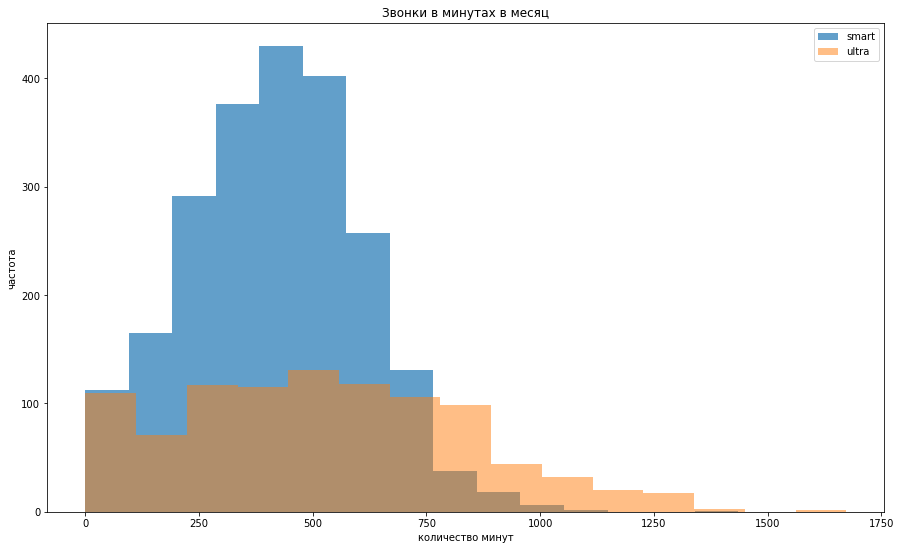

In [59]:
# выделяем каждый тариф в отдельную переменную
x = data[data['tariff'] == 'smart']['month_calls_duration']
y = data[data['tariff'] == 'ultra']['month_calls_duration']
# рисуем график
bins = 15
fig, ax = plt.subplots(figsize=(15,9)) 
plt.hist(x, bins, alpha=0.7, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.title('Звонки в минутах в месяц')
ax.set_xlabel('количество минут')
ax.set_ylabel('частота')
plt.legend()
plt.show()

На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана лежат рядом и там и там

In [60]:
data.groupby('tariff')\
  .agg({'gb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

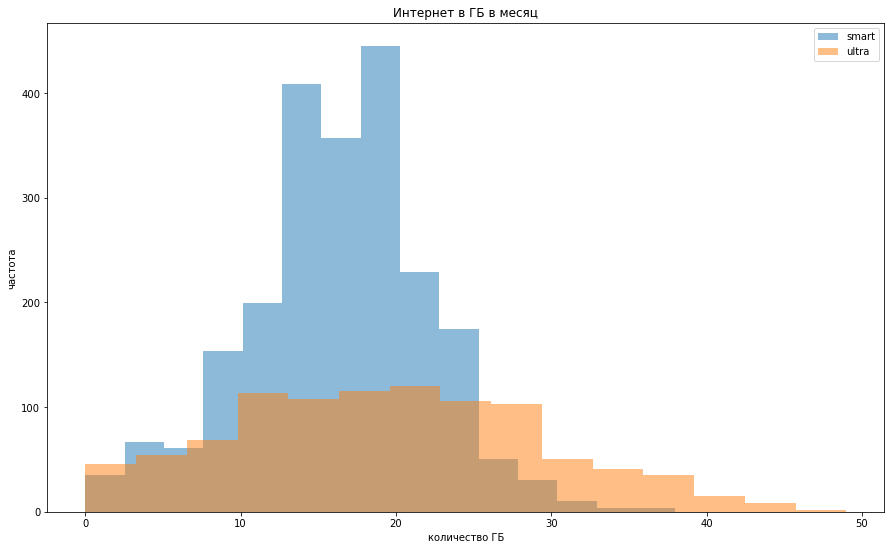

In [61]:
x = data[data['tariff'] == 'smart']['gb_total_in_month']
y = data[data['tariff'] == 'ultra']['gb_total_in_month']


bins = 15
fig, ax = plt.subplots(figsize=(15,9)) 
plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.title('Интернет в ГБ в месяц')
ax.set_xlabel('количество ГБ')
ax.set_ylabel('частота')
plt.legend()
plt.show()

Среднее и медиана лежат рядом и там и там и тут тоже. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше

In [62]:
data.groupby('tariff')\
  .agg({'sms_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

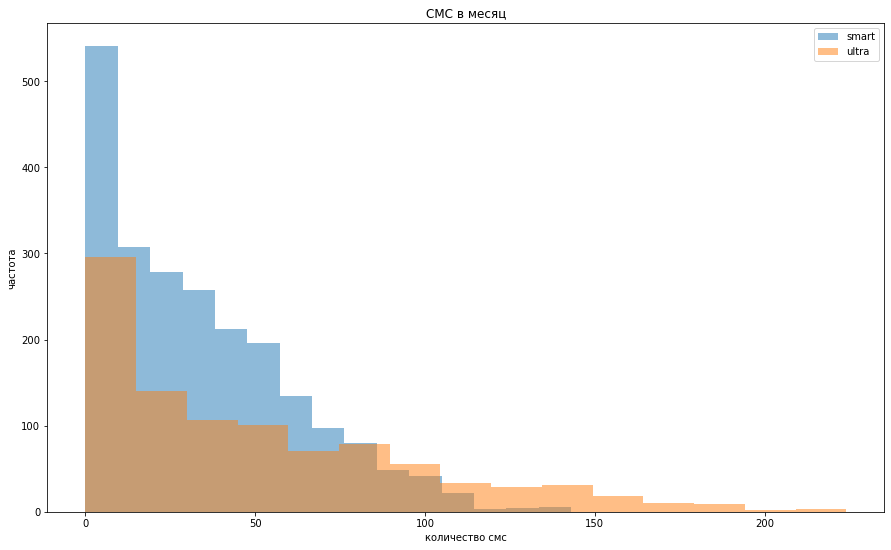

In [63]:
x = data[data['tariff'] == 'smart']['sms_total_in_month']
y = data[data['tariff'] == 'ultra']['sms_total_in_month']


bins = 15
fig, ax = plt.subplots(figsize=(15,9)) 
plt.hist(x, bins, alpha=0.5, label='smart')
plt.hist(y, bins, alpha=0.5, label='ultra')
plt.title('СМС в месяц')
ax.set_xlabel('количество смс')
ax.set_ylabel('частота')
plt.legend()
plt.show()

Поведение пользователей выглядит похожим. Ультра не выходит за рамки тарифа, на смарте есть превышения. В подавляющем большинстве пользоватям СМС не нужны.

### Вывод по анализу данных

2229 пользователей на фарифе "smart"
985 пользователей на фарифе "ultra"

Ультру, видимо, в основном платят по тарифу и мелкими группами вылазят на каждую тысячу рублей. А у Смарта люди вылезают за абонентскую плату чаще, для них это как будто дело привычное.

На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана лежат рядом и там и там.

Среднее и медиана лежат рядом и там и там и тут тоже. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше.

Поведение пользователей выглядит похожим. Ультра не выходит за рамки тарифа, на смарте есть превышения. В подавляющем большинстве пользоватям СМС не нужны.

## Проверка гипотез

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

**Поясните:**

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Гипотеза о равенстве средних двух генеральных совокупностей №1

In [64]:
ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']

In [65]:
ultra['total_paid'].describe()

count     985.00
mean    2,070.15
std       376.19
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: total_paid, dtype: float64

Посмотрели на выборку пользователей "Ультра". Границы выбросов сошлись в точке 1950, она же медиана. Среднее значение 2070.

In [66]:
smart['total_paid'].describe()

count   2,229.00
mean    1,289.97
std       818.40
min       550.00
25%       550.00
50%     1,023.00
75%     1,750.00
max     6,770.00
Name: total_paid, dtype: float64

Выборка "Смарт". Границы выбросов от 550 до 1750, медиана 1023. Среднее значение 1289. 

Выборки разного размера, есть сомнения, что дисперсии у совокупностей одинаковые, параметр equal_var при вызове метода scipy.stats.ttest_ind() укажем, как False, и тест посчитает дисперсии выборок по отдельности.

In [67]:
# Напишем функцию для удаления выбросов

def delete_outliers(data, column):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))
    return data.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

- H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
- H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [68]:
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,gb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,5.00,159.00,22.00,22.00,3.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,6.00,172.00,43.00,60.00,23.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,7.00,340.00,47.00,75.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,8.00,408.00,52.00,81.00,14.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,9.00,466.00,58.00,57.00,15.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,0.00,"1,950.00"


In [69]:
ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']

In [70]:
# удаляем выбросы перед тестом
#ultra = delete_outliers(ultra, 'total_paid')
ultra = ultra['total_paid']
#ultra.tolist() # проверим, как отработала функция

In [71]:
smart = delete_outliers(smart, 'total_paid')
smart = smart['total_paid']

In [72]:
alpha = 0.05 # критический уровень статистической значимости

In [73]:
results = st.ttest_ind(ultra, smart, equal_var = False)
# equal_var = False

In [74]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.877731264576296e-305
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [75]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Пермь', 'Сургут', 'Пенза',
       'Мурманск', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Оренбург', 'Магнитогорск', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Курган', 'Красноярск',
       'Владивосток', 'Смоленск', 'Владимир', 'Казань', 'Саратов',
       'Севастополь', 'Рязань', 'Екатеринбург', 'Стерлитамак',
       'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи', 'Вологда',
       'Чебоксары', 'Чита', 'Петрозаводск', 'Хабаровск', 'Ставрополь',
       'Улан-Удэ', 'Курск', 'Якутск', 'Химки', 'Владикавказ', 'Ижевск',
       'Орёл', 'Белгород', 'Архангельск', 'Липецк', 'Волжский', 'Тамбов',
       'Калининград', 'Новороссий

In [76]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Провинция')

In [77]:
moscow = data[data['region'] == 'Москва']
province = data[data['region'] == 'Провинция']

In [78]:
moscow = delete_outliers(moscow, 'total_paid')
moscow = moscow['total_paid']

In [79]:
province = delete_outliers(province, 'total_paid')
province = province['total_paid']

In [80]:
# equal_var = False
results = st.ttest_ind(moscow, province, equal_var = False)

In [81]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28193534711211565
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 30% такой результат может быть получен случайно. Значимых различий нет.

### Результаты исследования
Люди на разных тарифах ведут себя по-разному. Так и должно работать сегментирование. Но и переплачивают, а это, особенно в Смарте, может приводить к разочарованию и оттоку.

СМС-ки никому не нужны на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду

Деньги одинаково текут и из регионов и из Москвы, и вероятно это не связано с уровнем жизни, а с поведением: ~8-10 часов в месяц — это предел у среднего клиента на обоих тарифах

Тарифы приносят разные деньги, значимые различия есть. Cредний чек у пользователей Ультры больше. Но пользователей Смарт больше в два раза и они чаще выходят за лемит.

## Общий вывод

**Имеем 5 таблиц:**

Таблица users - информация о пользователях,
Таблица calls - информация о звонках,
Таблица messages - информация о сообщениях,
Таблица internet - информация об интернет-сессиях,
Таблица tariffs - информация о тарифах

**Предобработка данных:**

- Изменили неподходящие форматы
- Нашли и удалили ошибочный столбец
- Необходимые для анализа расчеты производятся за месяц. Работаем с данными за один календарный год, значит месяца повторяться не будут. Вместо форматирования дат добавили столбец с месяцем.

**Исследовательский анализ данных** 

- Расчитали и добавили в таблицу данные для каждого пользователя по месяцам:
    - о количестве сделанных звонков и израсходованных минут,
    - о количестве отправленных сообщений,
    - об объем израсходованного интернет-трафика,
    - помесячную выручку с каждого пользователя.
- Проанализировали поведение пользователей:
    - 2229 пользователей на фарифе "smart"
    - 985 пользователей на фарифе "ultra"

**Вввод исследования**

- Ультру, видимо, в основном платят по тарифу и мелкими группами вылазят на каждую тысячу рублей. А у Смарта люди вылезают за абонентскую плату чаще, для них это как будто дело привычное.

- На Смарте люди в месяц говорят около 450 минут, на Ультре 550 минут в месяц. То есть на Смарте люди подходят к краю своего тарифа, а на Ультре у них остается запас 2500 минут. Среднее и медиана лежат рядом и там и там.

- Среднее и медиана лежат рядом и там и там и тут тоже. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше.

- Поведение пользователей выглядит похожим. Ультра не выходит за рамки тарифа, на смарте есть превышения. В подавляющем большинстве пользоватям СМС не нужны.

- Люди на разных тарифах ведут себя по-разному. Так и должно работать сегментирование. Но и переплачивают, а это, особенно в Смарте, может приводить к разочарованию и оттоку.

- СМС-ки никому не нужны на обоих тарифах. Но если в Смарте люди близки к своим лимитам, то на Ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду

- Деньги одинаково текут и из регионов и из Москвы, и, вероятно, это не связано с уровнем жизни, а с поведением: ~8-10 часов в месяц — это предел у среднего клиента на обоих тарифах

- Тарифы приносят разные деньги, значимые различия есть. Cредний чек у пользователей Ультры больше. Но пользователей Смарт больше в два раза и они чаще выходят за лемит.

**Рекомендации оператору**

- Не публиковать незашифрованные ФИО и города в одном наборе
- Подумать над оптимизацией тарифов